In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Evaluation Project - 1

**Baseball Case Study**
**Problem Statement:**
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that
predicts the number of wins for a given team in the 2015 season based on several different indicators of success. 
There are 16 different features that will be used as the inputs to the machine learning and the output will be 
a value that represents the number of wins. 

-- **Input features:** Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,
    Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- **Output:** Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics:
    https://en.wikipedia.org/wiki/Baseball_statistics

**For downloading the dataset, use the link given below.**

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

In [2]:
df=pd.read_csv(' baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
# fetching the all feature names
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


#### All features are of continous type and nonull values are present.

In [5]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


**1) Most of the features have 50% quartile value and Mean value almost Same.
2) SO,SB,ER ,RA,CG,SHO ,SV,E in these features we can observe there is lots of diff. between 75% value and Max value , 
so there is possibility of finding outliers .
3)All features have same number of records so no null value present**

array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'BB'}>],
       [<AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'ER'}>],
       [<AxesSubplot:title={'center':'ERA'}>,
        <AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'SHO'}>,
        <AxesSubplot:title={'center':'SV'}>],
       [<AxesSubplot:title={'center':'E'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

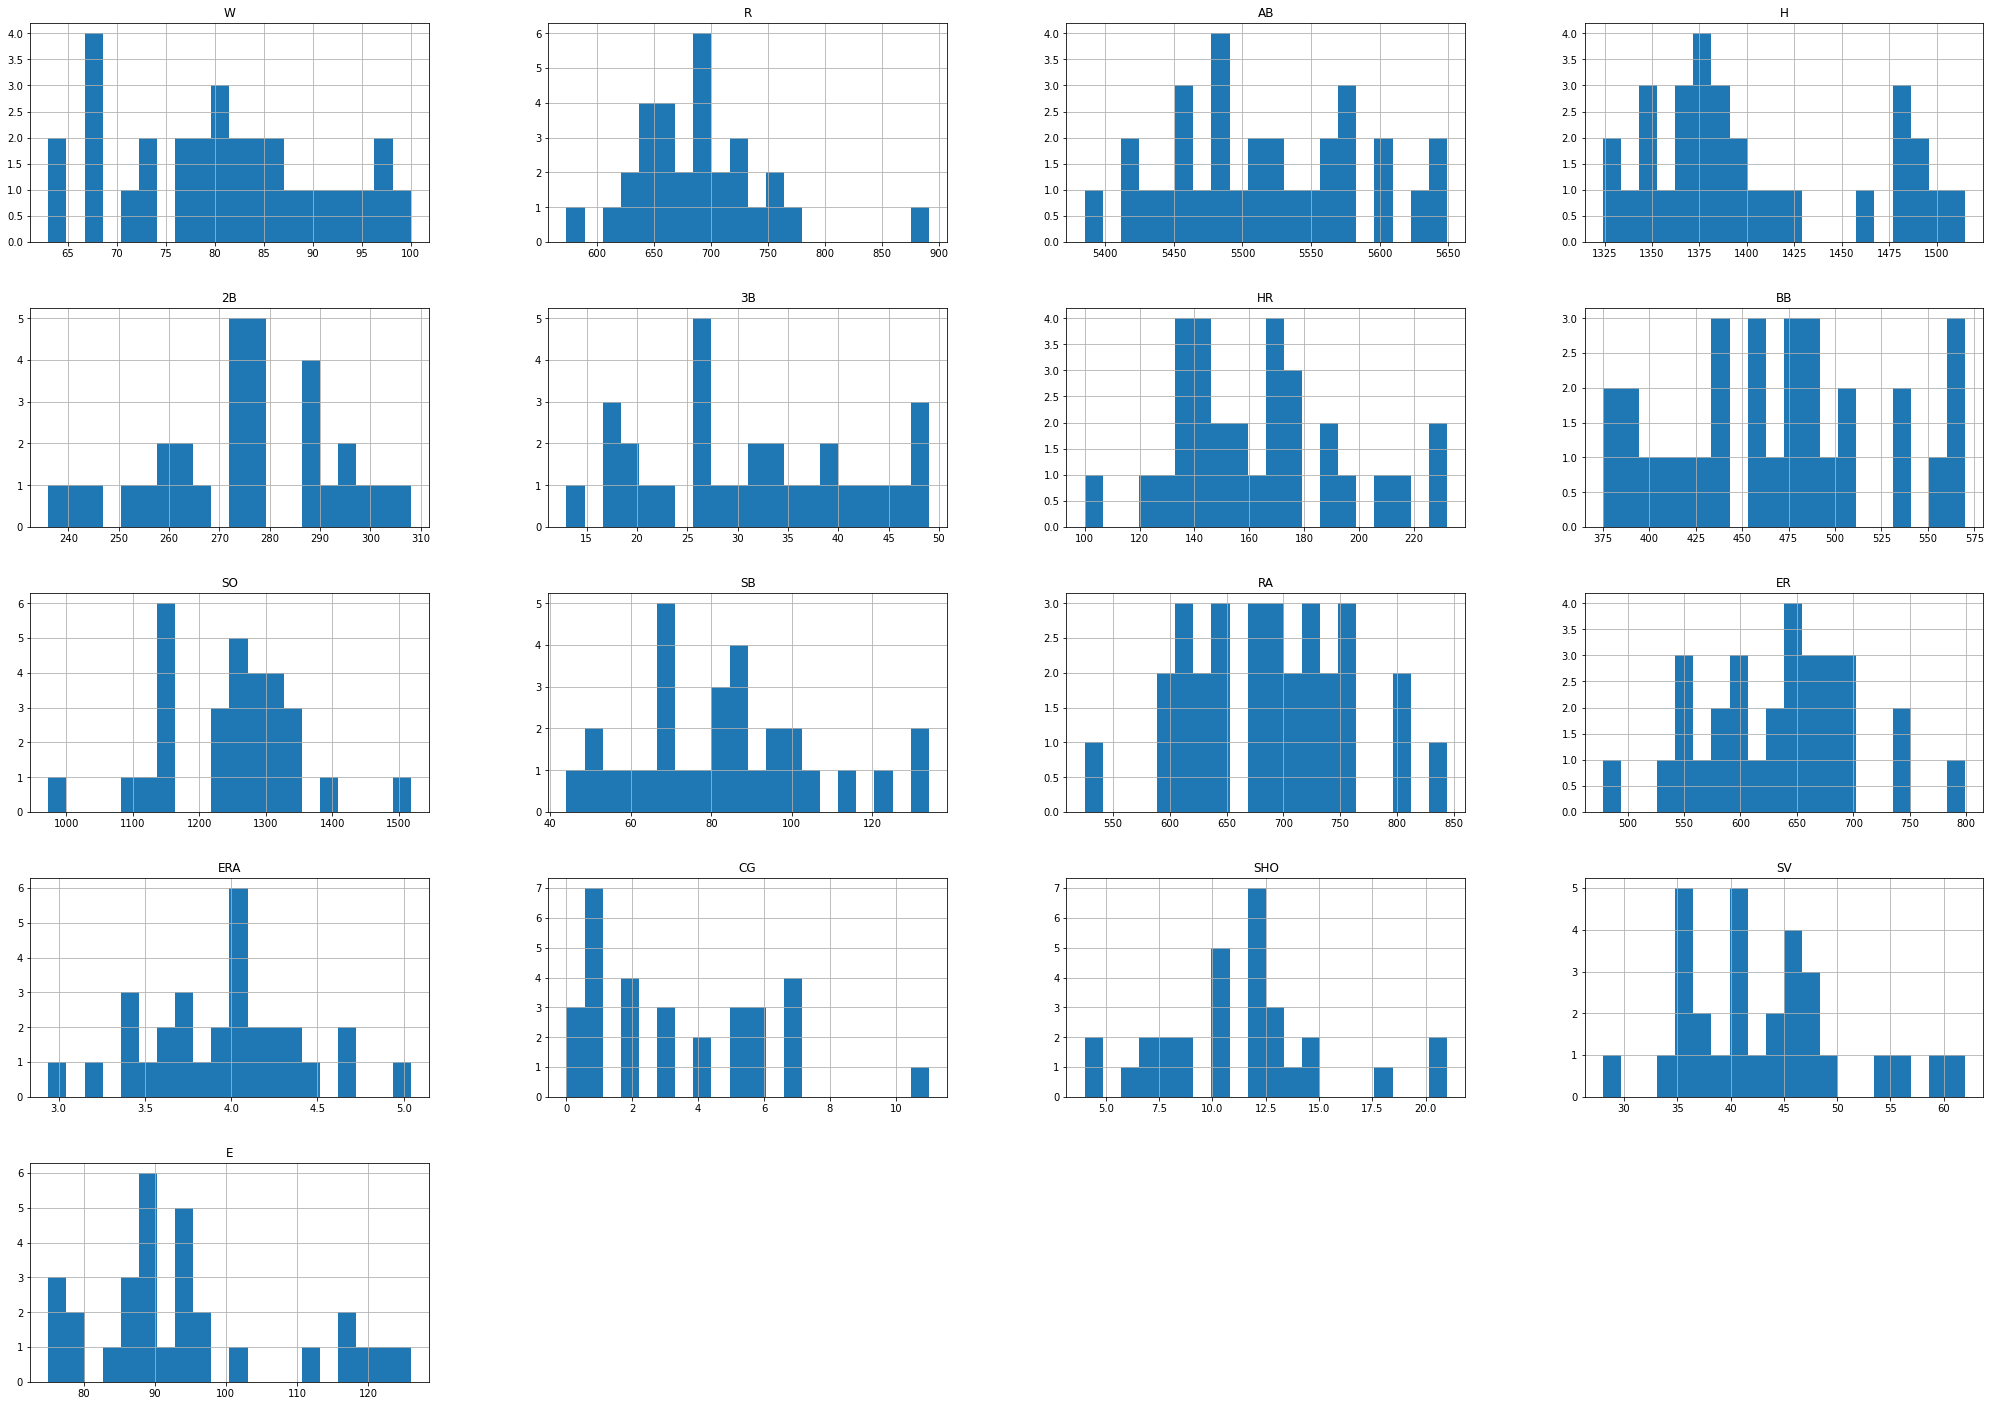

In [6]:
df.hist(layout=(5,4),figsize=(35,25),bins=20)

#### In most of the features we can see skewness is present .Data is not normally distributed .

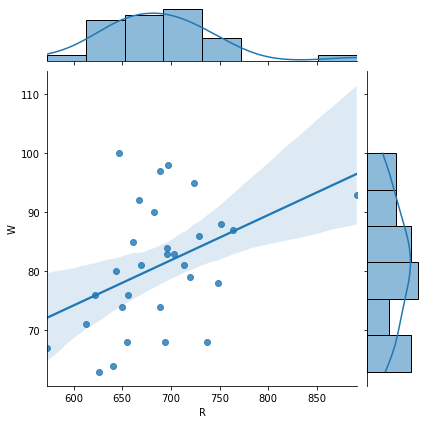

In [7]:
# W vs R
sns.jointplot( x='R',y='W' ,data=df,kind='reg' )

#### When "R" data is quite normally distributed major wins are when R is between (675-725).   

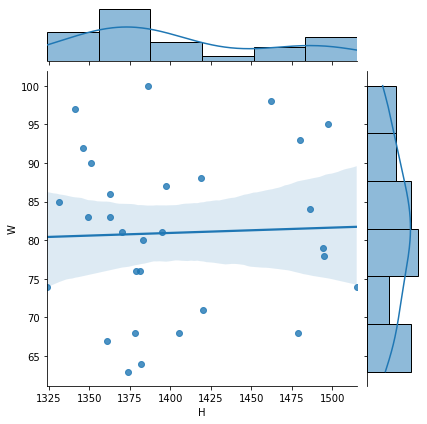

In [8]:
sns.jointplot(x='H', y='W' ,data=df,kind='reg' )

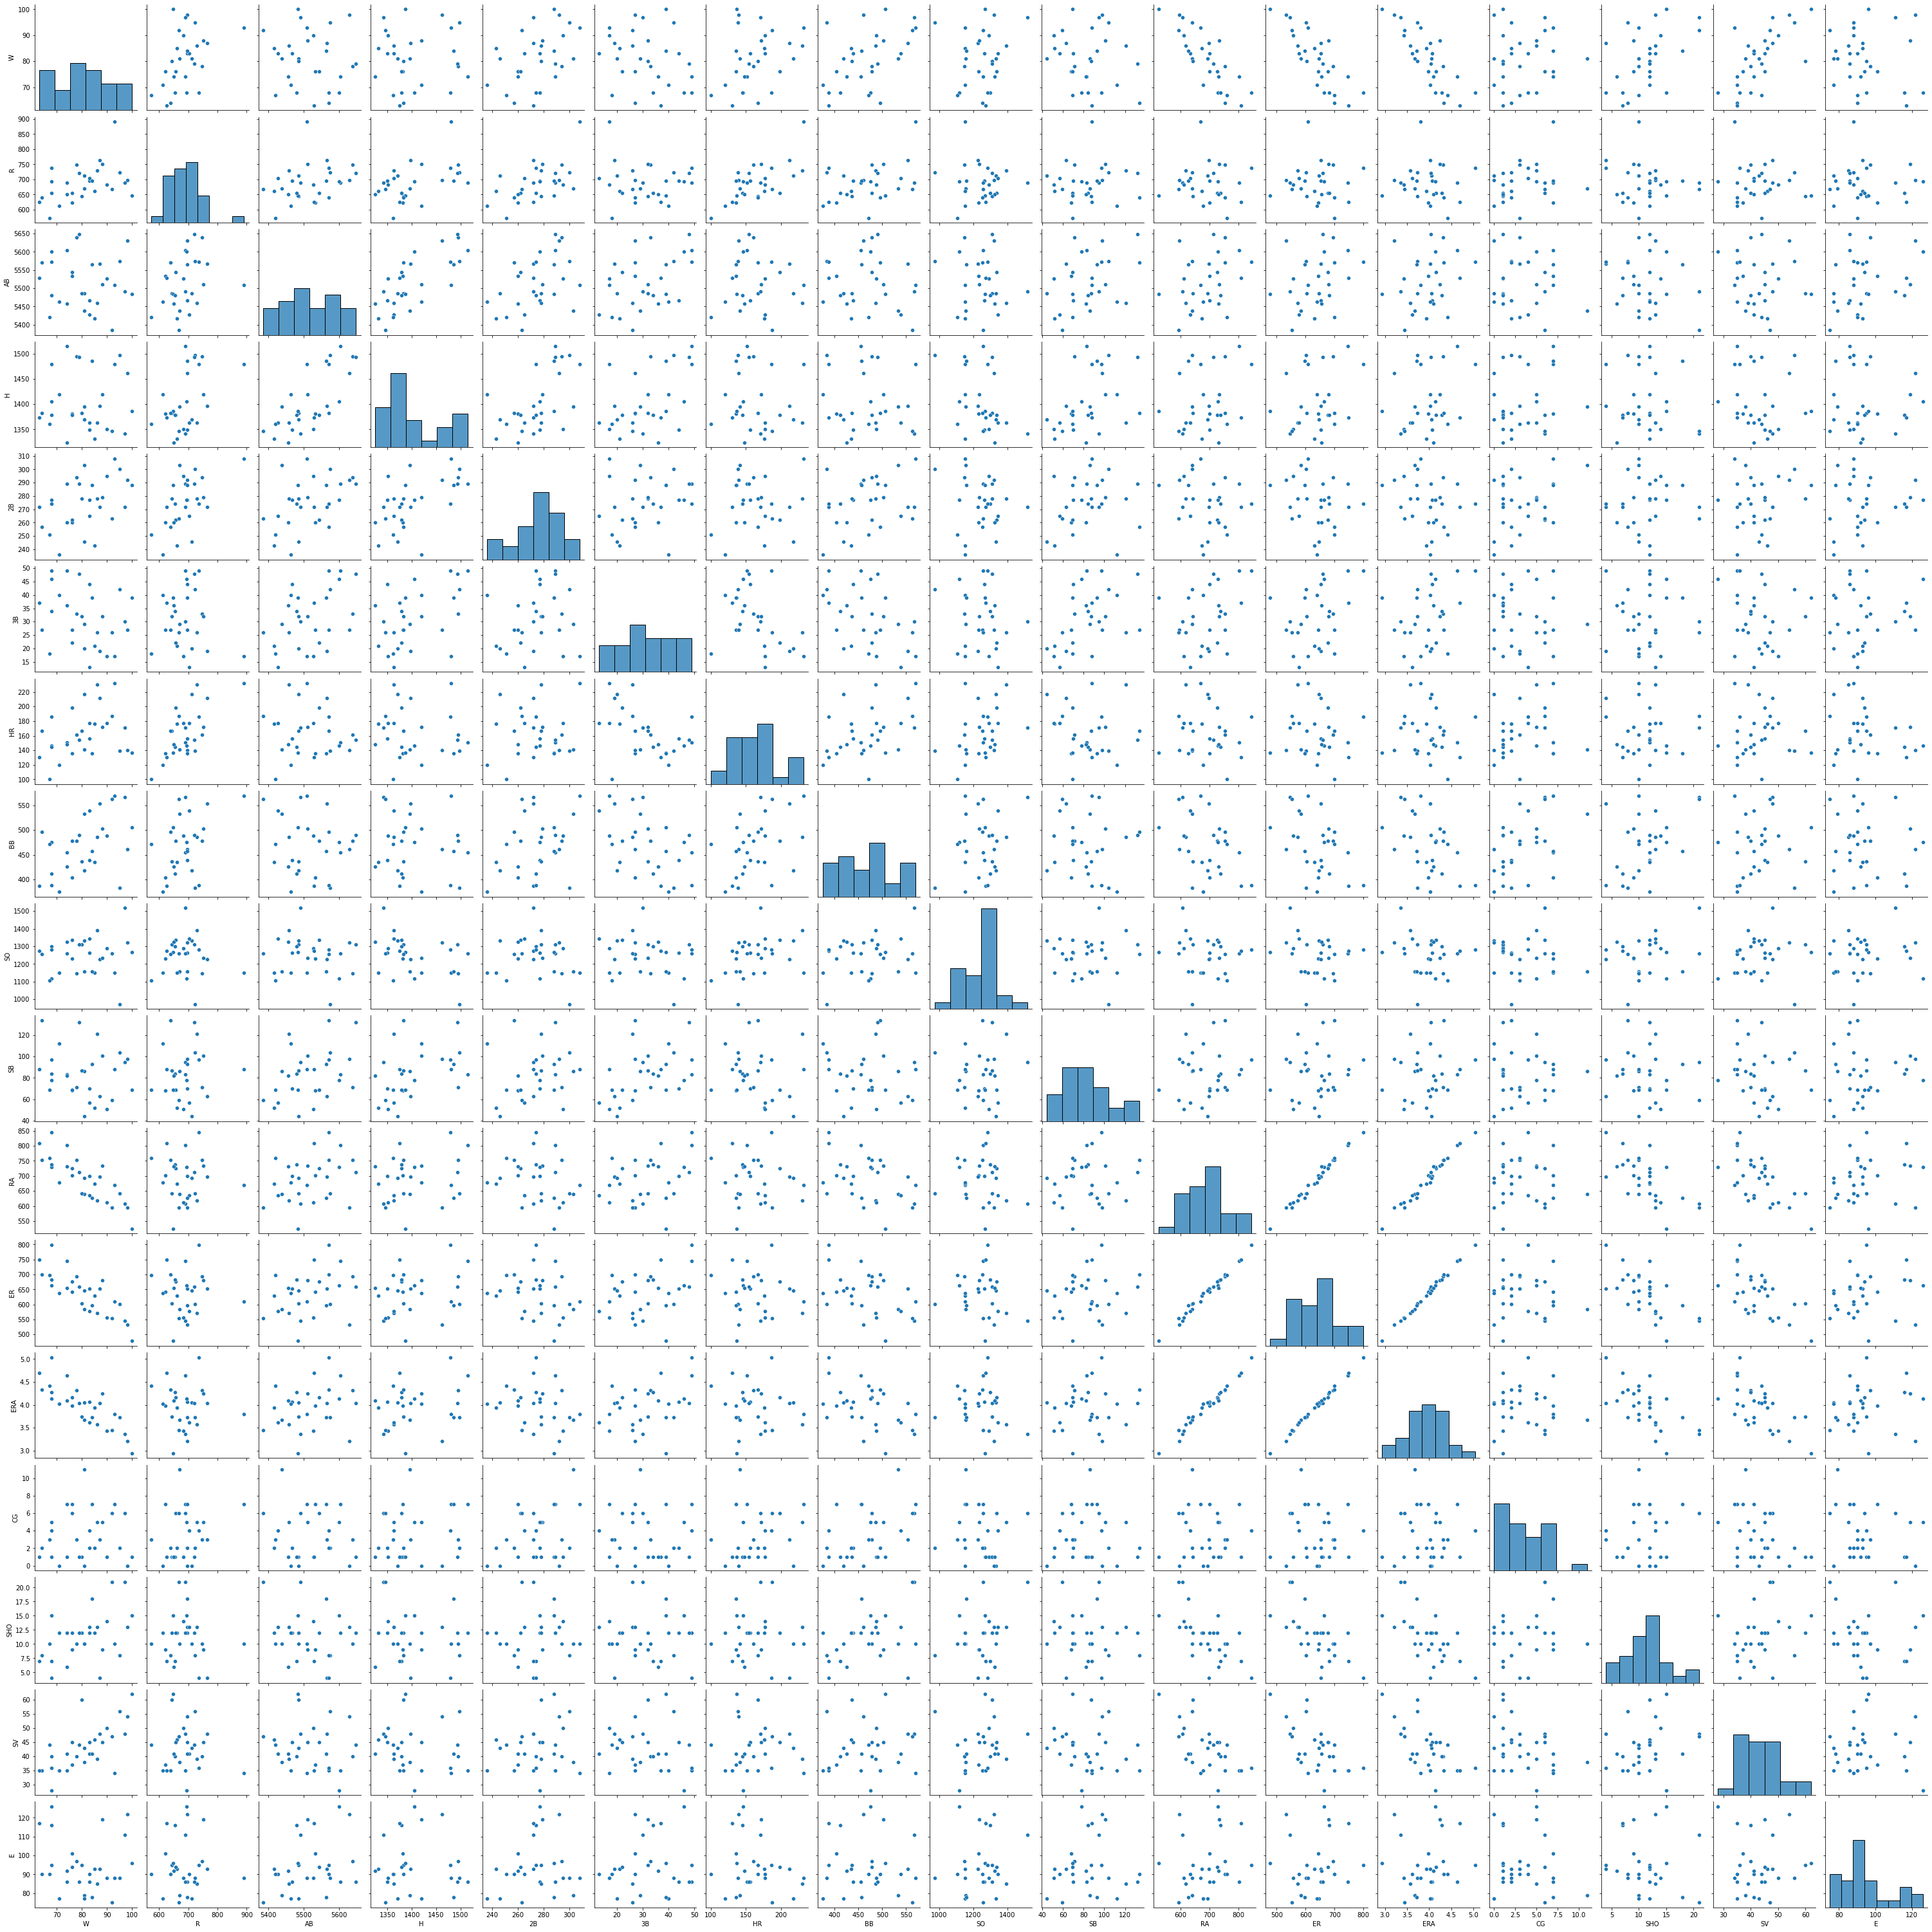

In [9]:
sns.pairplot(df)

**we can see 'W' has +ve correlation with [ 'R', '2B', 'HR', 'BB', 'SO',  'CG', 'SHO', 'SV' ] **and -vely correlated with
['SB', 'RA', 'ER','ERA','E']**

we can see 'W' has +ve correlation with [ 'R', '2B', 'HR', 'BB', 'SO', 'CG', 'SHO', 'SV' ] **and -vely correlated with ['SB', 'RA', 'ER','ERA','E']

In [10]:
round(df.corr(),2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.00,0.43,-0.09,0.04,0.43,-0.25,0.31,0.48,0.11,-0.16,-0.81,-0.81,-0.82,0.08,0.47,0.67,-0.09
R,0.43,1.00,0.32,0.48,0.56,-0.07,0.67,0.40,-0.05,0.08,-0.04,-0.04,-0.05,0.23,-0.10,-0.10,-0.02
AB,-0.09,0.32,1.00,0.74,0.45,0.44,-0.07,-0.14,-0.11,0.37,0.32,0.31,0.26,-0.08,-0.20,-0.11,0.32
H,0.04,0.48,0.74,1.00,0.57,0.48,-0.09,-0.12,-0.40,0.41,0.22,0.25,0.23,0.15,-0.15,-0.13,-0.03
2B,0.43,0.56,0.45,0.57,1.00,0.22,0.06,0.30,-0.15,0.20,-0.22,-0.24,-0.25,0.31,0.06,0.17,0.11
3B,-0.25,-0.07,0.44,0.48,0.22,1.00,-0.43,-0.45,-0.14,0.46,0.31,0.34,0.33,-0.07,-0.04,-0.14,0.13
HR,0.31,0.67,-0.07,-0.09,0.06,-0.43,1.00,0.43,0.36,-0.14,-0.10,-0.09,-0.09,0.16,-0.02,-0.03,-0.21
BB,0.48,0.40,-0.14,-0.12,0.30,-0.45,0.43,1.00,0.23,-0.10,-0.42,-0.45,-0.46,0.46,0.43,0.10,-0.08
SO,0.11,-0.05,-0.11,-0.40,-0.15,-0.14,0.36,0.23,1.00,0.03,-0.13,-0.16,-0.18,-0.09,0.24,0.13,0.16
SB,-0.16,0.08,0.37,0.41,0.20,0.46,-0.14,-0.10,0.03,1.00,0.13,0.14,0.13,-0.02,-0.11,-0.18,0.08


<AxesSubplot:>

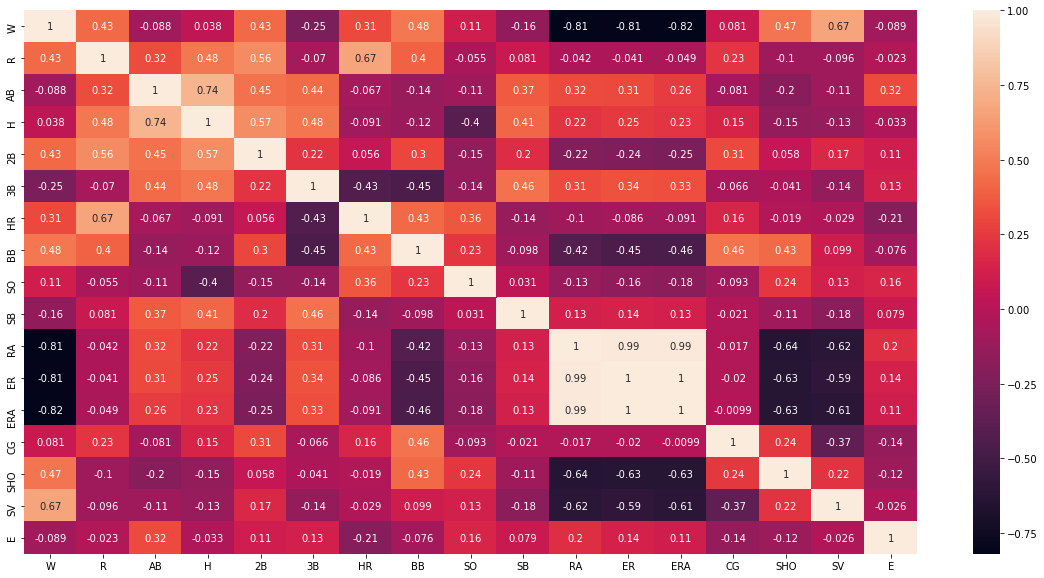

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

#### RA,ER,ERA are highly correlated with each other (.99,1) so 1 of the feature is enough to discribe other two

### Checking Multicollinearity

In [12]:

# function to select for highly correlated features. 
#will remove first feature which is highly correlared with any other feature

def correlation(dataset , threshold):
    col_corr =set() # set of all names of correlated features we have taken st from preventing duplicate entries of columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        
        for j in range(i):
            if(corr_matrix.iloc[i,j]> threshold):
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [13]:
#Finding Multicolinearity
cor_features=correlation(df ,0.95)
len(cor_features)

2

In [14]:
cor_features

{'ER', 'ERA'}

In [15]:
#### will drop {'ER', 'ERA'} these features. since RA 

In [16]:
df.drop(['ER', 'ERA'],axis=1, inplace=True)

In [17]:
round(df.corr()['W'],2)

W      1.00
R      0.43
AB    -0.09
H      0.04
2B     0.43
3B    -0.25
HR     0.31
BB     0.48
SO     0.11
SB    -0.16
RA    -0.81
CG     0.08
SHO    0.47
SV     0.67
E     -0.09
Name: W, dtype: float64

Text(0.5, 1.0, 'Correlation with target')

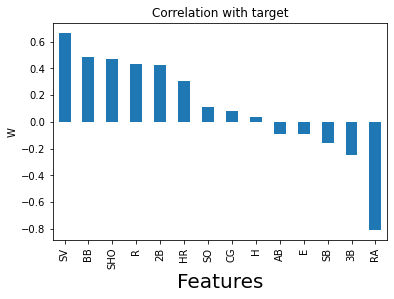

In [18]:
#Correlation with target
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar')
plt.xlabel('Features',fontsize=20)
plt.ylabel('W')
plt.title('Correlation with target')

####  'SV' has heighest +ve correlation with 'W' and 'RA'  has strongest _ve correlation.

### Checking Skewness

In [19]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

#### lets consider acceptable range of skewness +/- 0.5 .In ['R','H','CG','SV','E'] features skewness is present . will remove it by using Square root method . 

### Square Root method

In [20]:

df['R']=np.sqrt(df['R'])
df['H']=np.sqrt(df['H'])
df['CG']=np.sqrt(df['CG'])
df['E']=np.sqrt(df['E'])
df['SV']=np.sqrt(df['SV'])

In [21]:
[round(df.corr()['W'],2)]

[W      1.00
 R      0.44
 AB    -0.09
 H      0.04
 2B     0.43
 3B    -0.25
 HR     0.31
 BB     0.48
 SO     0.11
 SB    -0.16
 RA    -0.81
 CG     0.04
 SHO    0.47
 SV     0.67
 E     -0.09
 Name: W, dtype: float64]

In [22]:
df['E']=np.sqrt(df['E'])

In [23]:
print([df.skew()])

[W      0.047089
R      0.968676
AB     0.183437
H      0.649567
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
CG    -0.311476
SHO    0.565790
SV     0.410288
E      0.697584
dtype: float64]


#### Since 'R' has heighest +ve correlation with target we won't remove more skewness from it.

#### Checking Outliers

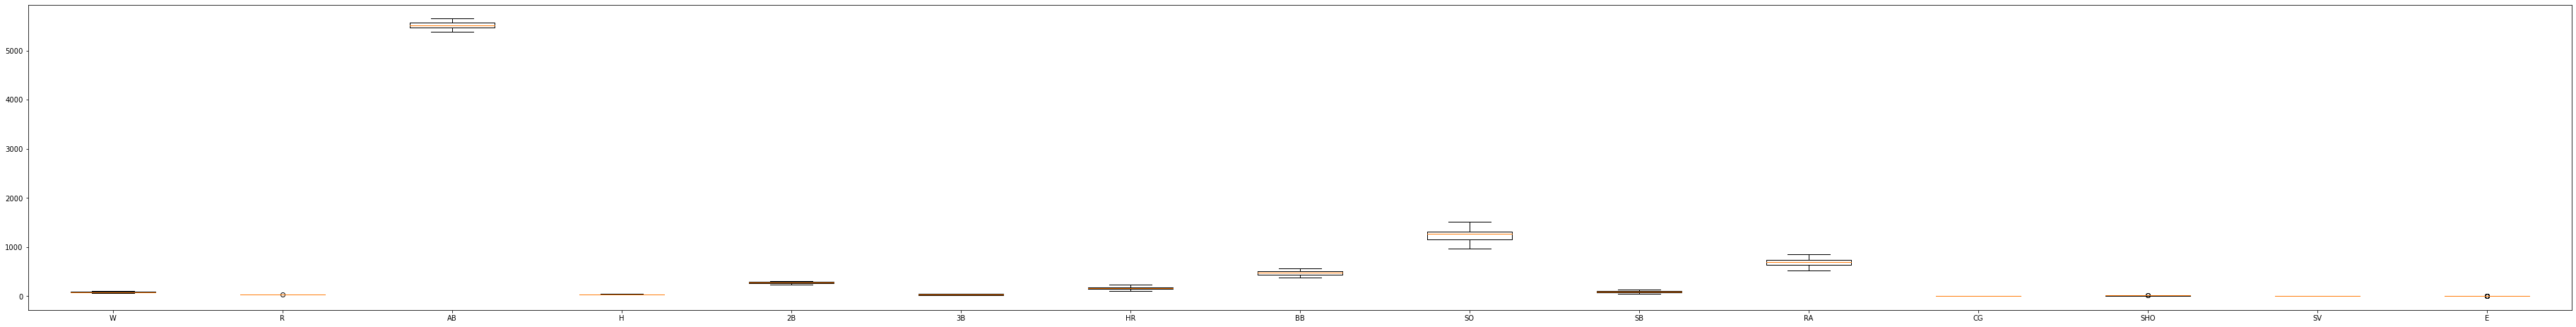

In [24]:
fig = plt.figure(figsize =(50,6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot

bp = ax.boxplot(df ,data=df,labels=df.columns)

# show plot
plt.show()

#### There are very less outliers present n those all are very close to upper limit. so will not remove them.

### Data spliting for training model

In [25]:
y=df['W']
x=df.drop('W',axis=1)


In [26]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [27]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,26.907248,5575,38.691084,300,42,139,383,973,104,641,1.414214,8,7.483315,3.062814
1,26.381812,5467,36.728735,277,44,156,439,1264,70,700,1.414214,12,6.708204,3.045262
2,25.865034,5439,37.349699,303,29,141,533,1157,86,640,3.316625,10,6.164414,2.981308
3,24.939928,5533,37.161808,260,27,136,404,1231,68,701,2.645751,9,6.082763,3.170154
4,26.248809,5605,38.923001,289,49,151,455,1259,83,803,2.645751,12,5.916080,3.045262


In [28]:
print(f"Train shape{x.shape}")
print(f"Test shape{y.shape}")

Train shape(30, 14)
Test shape(30,)


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=40,test_size=0.25)

### Feature Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler
#Creating MinMax Object
mm = MinMaxScaler()
## FITTING AND TRANSFORMING TRAINNG DATA
x_train= mm.fit_transform(x_train)
x_test=mm.transform(x_test)

In [31]:
x_train

array([[0.54299972, 0.70833333, 0.8165627 , 0.52777778, 1.        ,
        0.65151515, 0.06666667, 0.56880734, 0.60227273, 1.        ,
        0.75592895, 0.        , 0.08827509, 0.49764776],
       [0.43583213, 0.16287879, 0.20977098, 0.40277778, 0.        ,
        0.58333333, 0.84102564, 0.68073394, 0.14772727, 0.16064257,
        0.75592895, 0.52941176, 0.2987822 , 0.38121719],
       [0.51801007, 0.28030303, 0.20977098, 0.58333333, 0.36111111,
        0.98484848, 0.56923077, 0.76880734, 0.875     , 0.09236948,
        0.84515425, 0.52941176, 0.21621039, 0.25982928],
       [0.39095248, 0.83333333, 1.        , 0.73611111, 1.        ,
        0.38636364, 0.41025641, 0.52477064, 0.44318182, 0.83534137,
        1.        , 0.47058824, 0.04445286, 0.28452733],
       [0.24351942, 0.37878788, 0.3161818 , 0.58333333, 0.52777778,
        0.50757576, 0.31282051, 0.61834862, 0.48863636, 0.18875502,
        0.37796447, 0.47058824, 1.        , 0.49764776],
       [0.39095248, 0.40151515, 0.0

## regression problem

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score ,mean_absolute_error ,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor ,GradientBoostingRegressor


In [34]:
models=[KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),DecisionTreeRegressor(),GradientBoostingRegressor()]
max_r2_score =0
best_random_state=0
best_model=""
for i in range(50,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i ,test_size=0.2 )
    for model in models:
        model.fit(x_train,y_train)
        pred_train= model.predict(x_train)
        pred_test= model.predict(x_test)
        training_accuracy = r2_score(y_train ,pred_train )
        testing_accuracy = r2_score(y_test ,pred_test )
        print(f"For {model} At Random State {i}, the testing accuracy is :",round(testing_accuracy ,2),'\n\n')
        
        if testing_accuracy> max_r2_score:
            max_r2_score=testing_accuracy
            best_random_state=i
            best_model=model 
print(f"the best r2 score {round(max_r2_score ,2)} for model{best_model} is at Random state is{best_random_state}:")

For KNeighborsRegressor() At Random State 50, the testing accuracy is : 0.19 


For AdaBoostRegressor() At Random State 50, the testing accuracy is : 0.63 


For LinearRegression() At Random State 50, the testing accuracy is : 0.62 


For DecisionTreeRegressor() At Random State 50, the testing accuracy is : 0.36 


For GradientBoostingRegressor() At Random State 50, the testing accuracy is : 0.45 


For KNeighborsRegressor() At Random State 51, the testing accuracy is : 0.09 


For AdaBoostRegressor() At Random State 51, the testing accuracy is : -0.32 


For LinearRegression() At Random State 51, the testing accuracy is : 0.5 


For DecisionTreeRegressor() At Random State 51, the testing accuracy is : -0.44 


For GradientBoostingRegressor() At Random State 51, the testing accuracy is : -0.48 


For KNeighborsRegressor() At Random State 52, the testing accuracy is : 0.06 


For AdaBoostRegressor() At Random State 52, the testing accuracy is : 0.27 


For LinearRegression() At Random S

#### the best r2 score 0.92 for model LinearRegression() is at Random state is83:

In [43]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=83 ,test_size=0.2 )

lr.fit(x_train,y_train)
pred_train= lr.predict(x_train)
pred_test= lr.predict(x_test)
training_accuracy = r2_score(y_train ,pred_train )
testing_accuracy = r2_score(y_test ,pred_test )
print(f"For Linear Regression At Random State 83, the testing accuracy is :",round(testing_accuracy ,2),'\n\n')

For Linear Regression At Random State 83, the testing accuracy is : 0.92 




#### For Linear Regression At Random State 83, the testing accuracy is : 0.92 

In [45]:
print("Mean absolute error:" ,mean_absolute_error(y_test,pred_test))
print("Mean squared error:" ,mean_squared_error(y_test,pred_test))
print("Root Mean absolute error:" ,np.sqrt(mean_absolute_error(y_test,pred_test)))

Mean absolute error: 3.1016571519421157
Mean squared error: 10.267592065331796
Root Mean absolute error: 1.7611522228195142
